
Training ALEXNET...


D:\anan\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anan\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 43.2563
Epoch 2/5, Loss: 21.4429
Epoch 3/5, Loss: 13.4062
Epoch 4/5, Loss: 18.8527
Epoch 5/5, Loss: 4.1067
Validation Accuracy: 0.9744
Test Accuracy: 0.9786


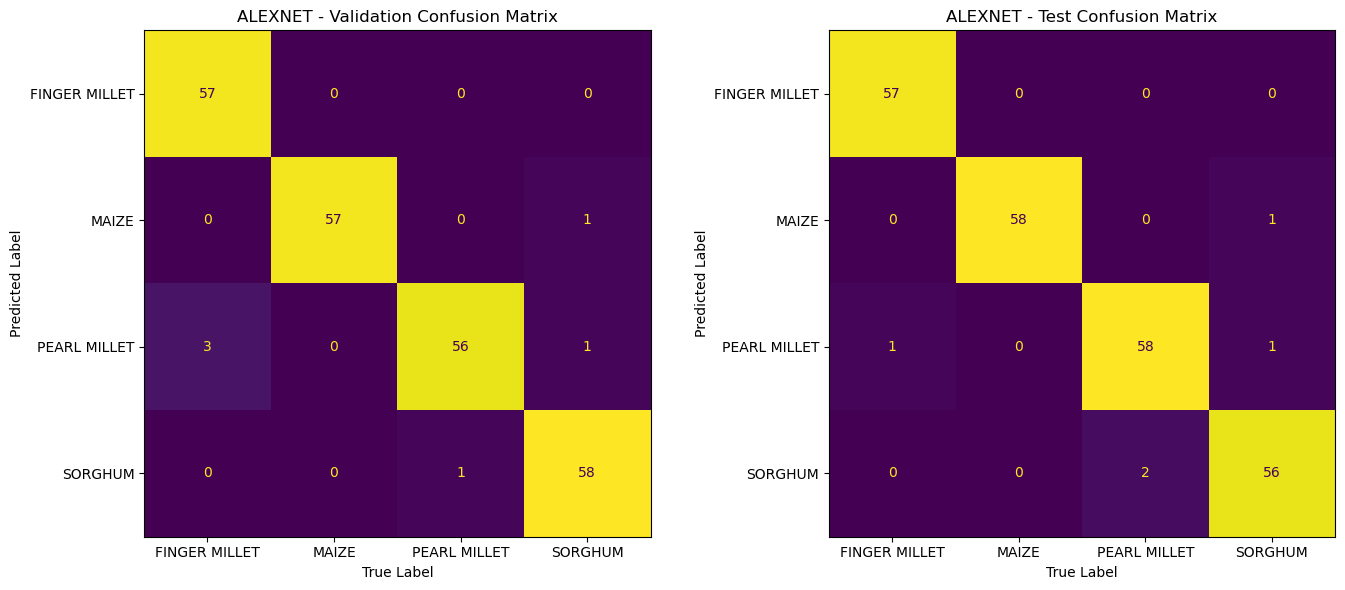


Training VGG16...


D:\anan\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anan\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 44.5765
Epoch 2/5, Loss: 14.8939
Epoch 3/5, Loss: 13.7460
Epoch 4/5, Loss: 3.0635
Epoch 5/5, Loss: 1.1046
Validation Accuracy: 0.8419
Test Accuracy: 0.8333


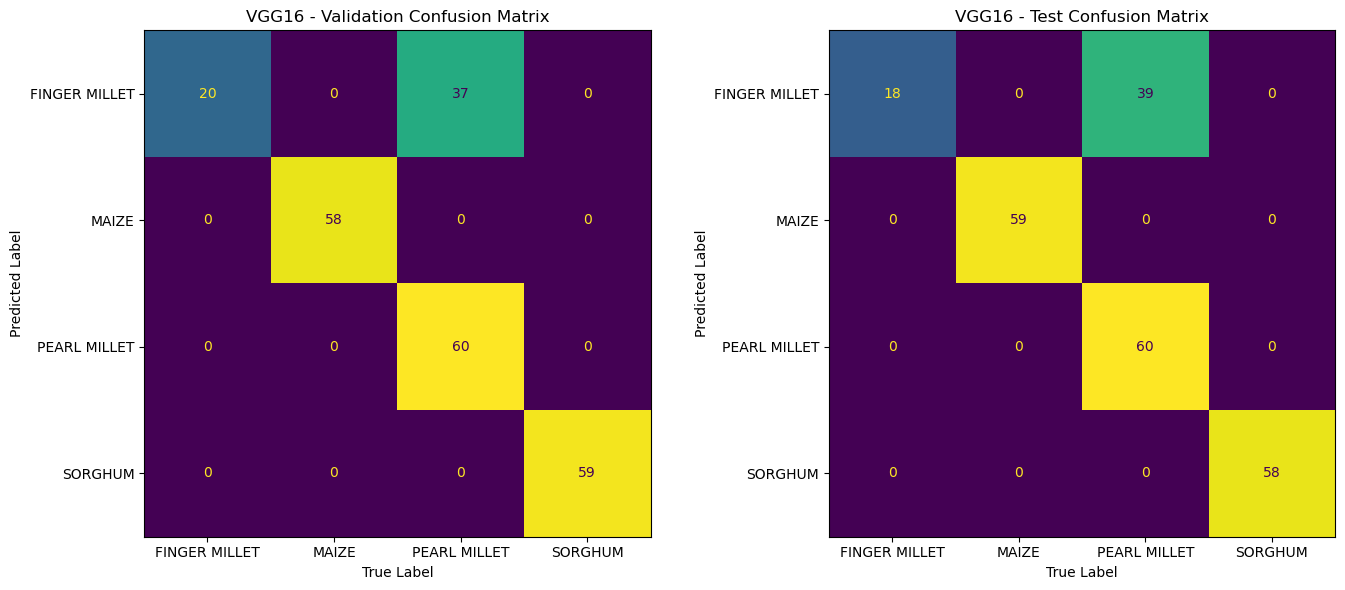


Training RESNET18...


D:\anan\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anan\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 28.4616
Epoch 2/5, Loss: 7.5306
Epoch 3/5, Loss: 4.5795
Epoch 4/5, Loss: 2.9658
Epoch 5/5, Loss: 3.4462
Validation Accuracy: 0.9915
Test Accuracy: 0.9872


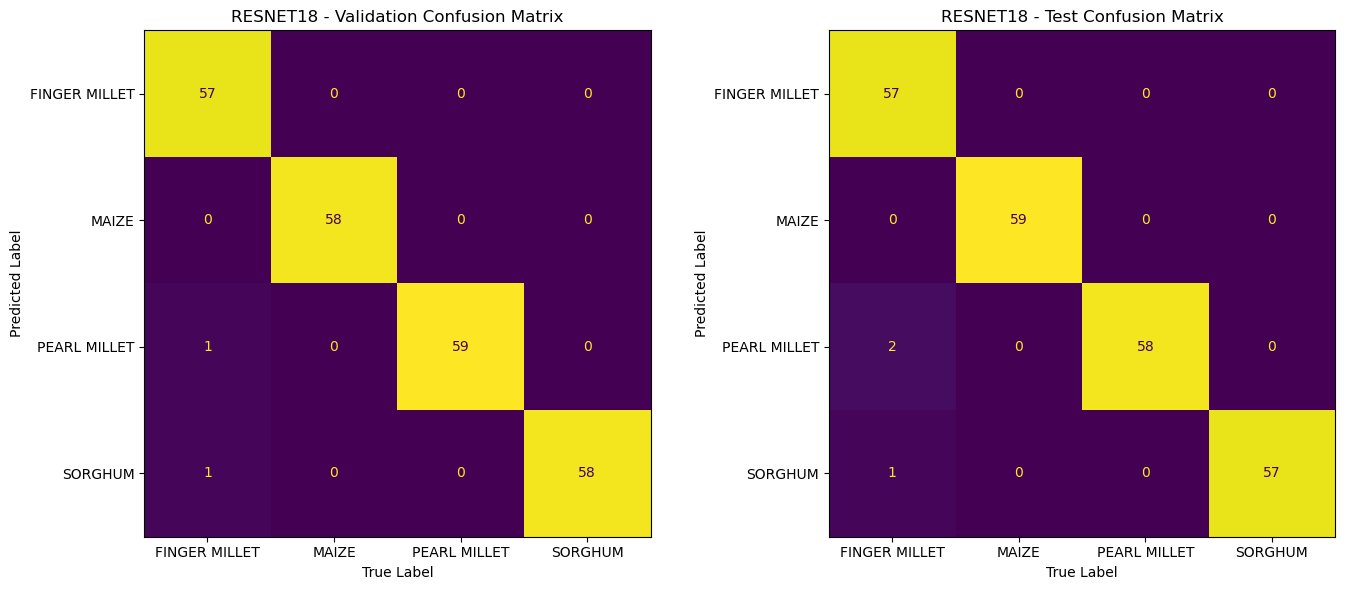


Training DENSENET121...


D:\anan\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anan\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 34.2330
Epoch 2/5, Loss: 9.0437
Epoch 3/5, Loss: 5.6916
Epoch 4/5, Loss: 3.6573
Epoch 5/5, Loss: 6.4700
Validation Accuracy: 0.9957
Test Accuracy: 0.9915


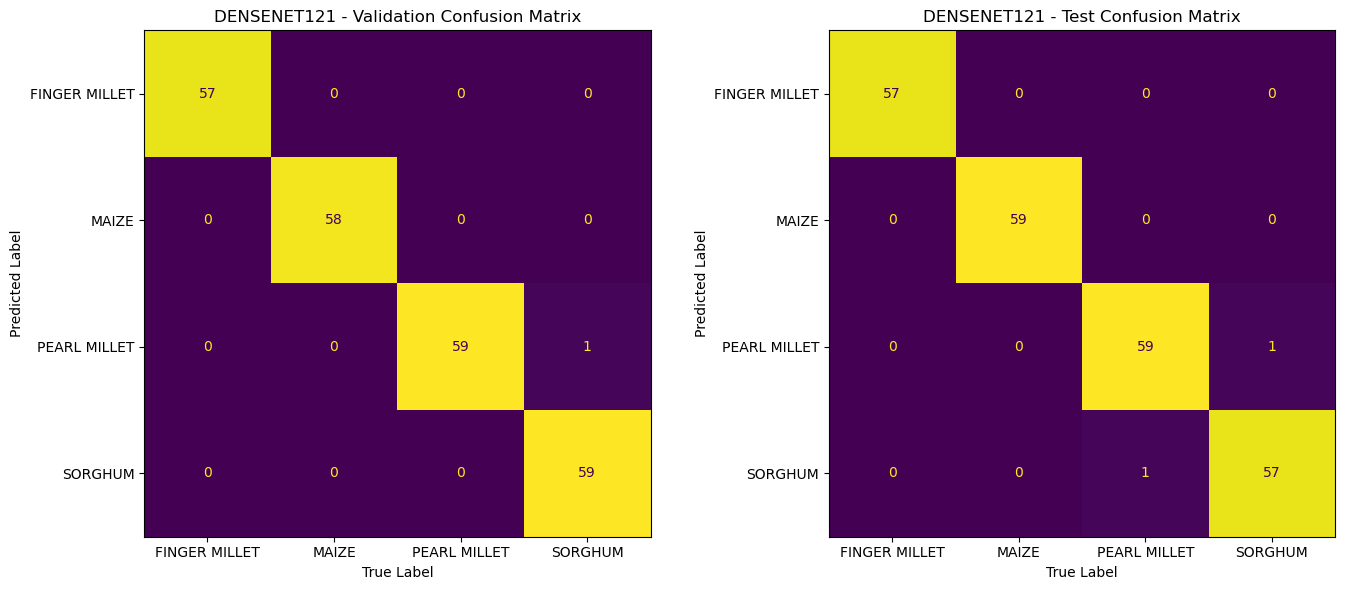


Training EFFICIENTNET_B0...


D:\anan\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anan\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 62.4485
Epoch 2/5, Loss: 23.5811
Epoch 3/5, Loss: 12.6497
Epoch 4/5, Loss: 6.7165
Epoch 5/5, Loss: 5.9914
Validation Accuracy: 0.9915
Test Accuracy: 0.9872


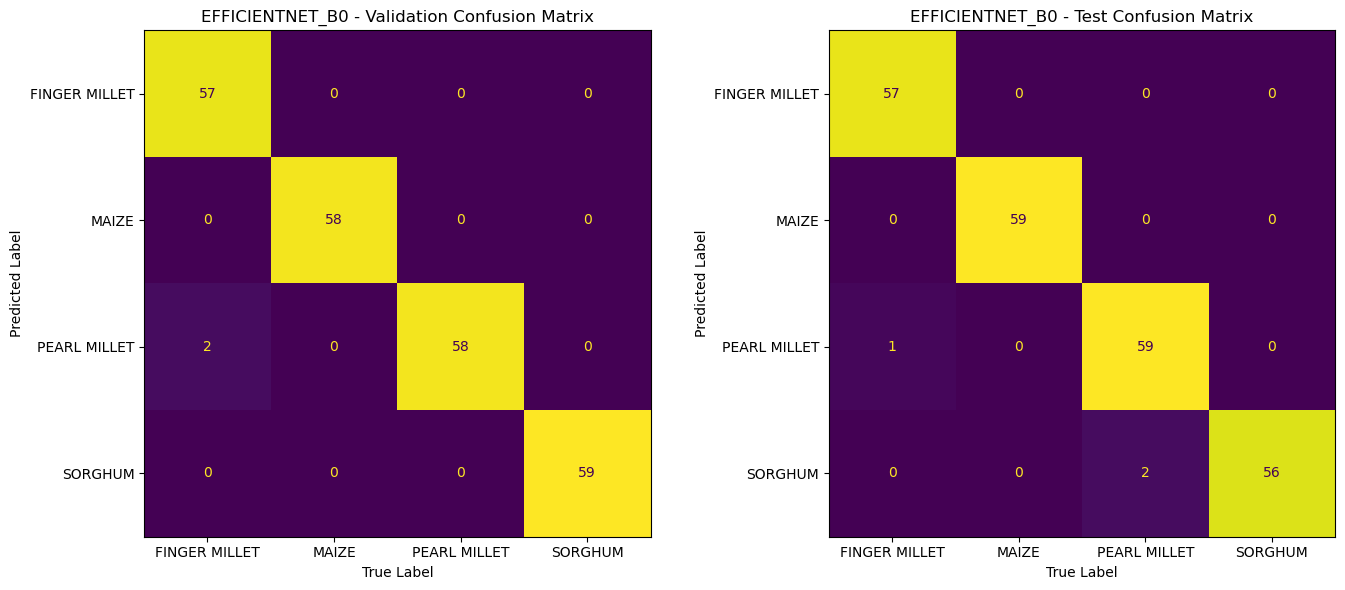

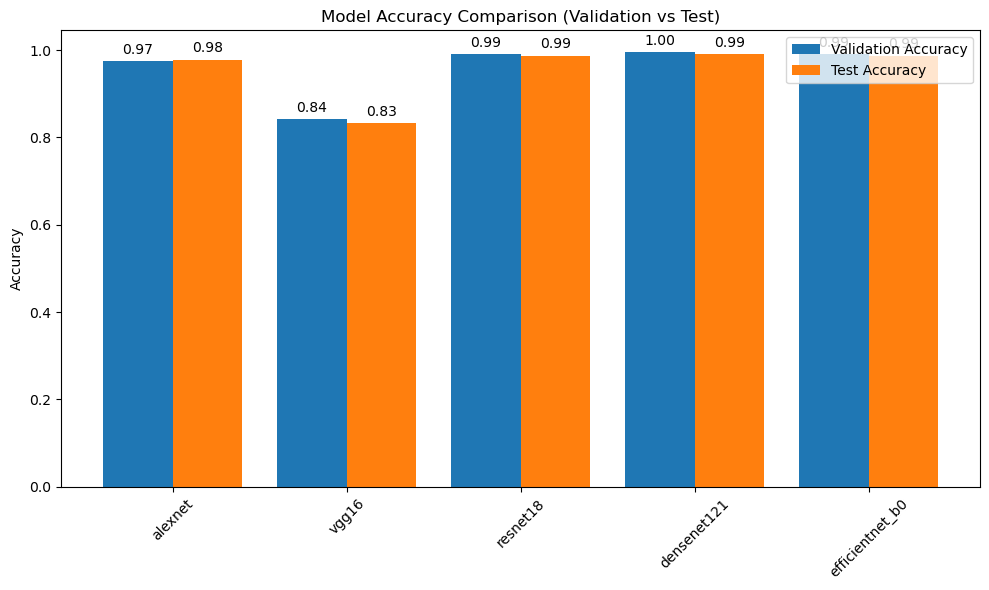

In [11]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import shutil

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define paths
base_path = r"C:\Users\hp\Desktop\121ME0017\ICRISAT"
classes = ["FINGER MILLET", "MAIZE", "SORGHUM", "PEARL MILLET"]
image_extensions = [".jpg", ".jpeg", ".png"]

# Step 1: Create CSV with image paths and labels
data = []
for label in classes:
    folder = os.path.join(base_path, label)
    for file in os.listdir(folder):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            data.append([os.path.join(folder, file), label])

df = pd.DataFrame(data, columns=["image_path", "label"])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle
df.to_csv("icrisat_images.csv", index=False)

# Step 2: Split Data
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

# Save splits
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

# Step 3: Custom Dataset Class
class ICRISATDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.label_map = {label: idx for idx, label in enumerate(sorted(df["label"].unique()))}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]["image_path"]
        label = self.label_map[self.df.iloc[idx]["label"]]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Step 4: Transforms & Dataloaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def get_dataloaders(batch_size=16):
    train_data = ICRISATDataset(train_df, transform=transform)
    val_data = ICRISATDataset(val_df, transform=transform)
    test_data = ICRISATDataset(test_df, transform=transform)
    return (
        DataLoader(train_data, batch_size=batch_size, shuffle=True),
        DataLoader(val_data, batch_size=batch_size, shuffle=False),
        DataLoader(test_data, batch_size=batch_size, shuffle=False),
        train_data.label_map
    )

train_loader, val_loader, test_loader, label_map = get_dataloaders()

# Step 5: Model setup function
def get_model(name, num_classes):
    if name == "alexnet":
        model = models.alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif name == "vgg16":
        model = models.vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    
    elif name == "resnet18":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "densenet121":
        model = models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif name == "efficientnet_b0":
        model = models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Unsupported model name")
    return model

# Step 6: Training and Evaluation
def train_and_evaluate(model_name):
    print(f"\nTraining {model_name.upper()}...")
    model = get_model(model_name, len(label_map)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()

            
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/5, Loss: {running_loss:.4f}")

    def evaluate(loader, set_name):
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device)
                labels = labels.to(device)

                
                outputs = model(imgs)

                preds = outputs.argmax(1).cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        print(f"{set_name} Accuracy: {acc:.4f}")
        return all_labels, all_preds, acc

    val_labels, val_preds, val_acc = evaluate(val_loader, "Validation")
    test_labels, test_preds, test_acc = evaluate(test_loader, "Test")

    # Confusion Matrices
    class_names = list(label_map.keys())

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    cm_val = confusion_matrix(val_labels, val_preds)
    disp_val = ConfusionMatrixDisplay(cm_val, display_labels=class_names)
    disp_val.plot(ax=ax[0], colorbar=False)
    ax[0].set_title(f'{model_name.upper()} - Validation Confusion Matrix')
    ax[0].set_xlabel('True Label')
    ax[0].set_ylabel('Predicted Label')

    cm_test = confusion_matrix(test_labels, test_preds)
    disp_test = ConfusionMatrixDisplay(cm_test, display_labels=class_names)
    disp_test.plot(ax=ax[1], colorbar=False)
    ax[1].set_title(f'{model_name.upper()} - Test Confusion Matrix')
    ax[1].set_xlabel('True Label')
    ax[1].set_ylabel('Predicted Label')

    plt.tight_layout()
    plt.savefig(f"{model_name}_confusion_matrices.png")
    plt.show()

    return model_name, val_acc, test_acc

# Step 7: Run all models
model_names = ["alexnet", "vgg16", "resnet18", "densenet121", "efficientnet_b0"]
results = []
for name in model_names:
    results.append(train_and_evaluate(name))

# Step 8: Accuracy Comparison Bar Plot
models, val_scores, test_scores = zip(*results)
x = range(len(models))

plt.figure(figsize=(10, 6))
val_bars = plt.bar([i - 0.2 for i in x], val_scores, width=0.4, label='Validation Accuracy')
test_bars = plt.bar([i + 0.2 for i in x], test_scores, width=0.4, label='Test Accuracy')

# Add score labels on top of bars
for bar in val_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.xticks(x, models, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Validation vs Test)")
plt.legend()
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()



Training GOOGLENET...


D:\anan\Lib\site-packages\torchvision\models\googlenet.py:341: UserWarning: auxiliary heads in the pretrained googlenet model are NOT pretrained, so make sure to train them
  warnings.warn(


Epoch 1/5, Loss: 46.2405
Epoch 2/5, Loss: 13.2015
Epoch 3/5, Loss: 6.6902
Epoch 4/5, Loss: 7.2327
Epoch 5/5, Loss: 3.9986
Validation Accuracy: 0.9915
Test Accuracy: 1.0000


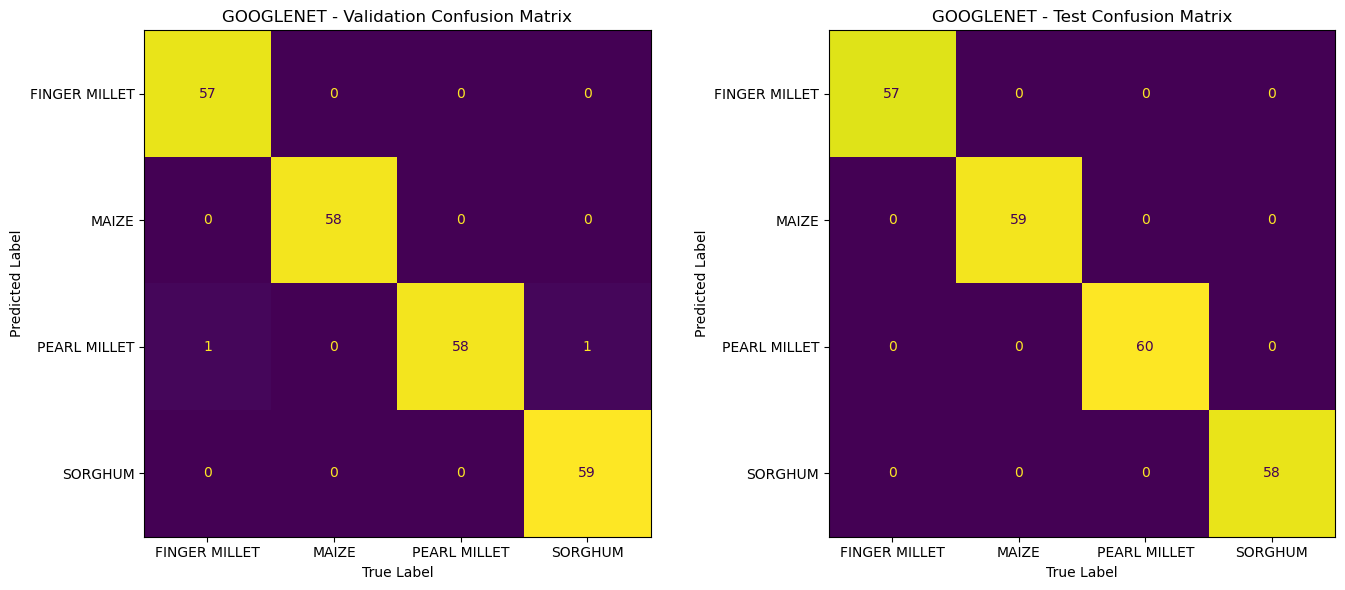

In [23]:


from torchvision.models import googlenet, GoogLeNet_Weights

def get_googlenet_model(num_classes):
    # Use weights properly and keep aux_logits=True
    weights = GoogLeNet_Weights.IMAGENET1K_V1  # or GoogLeNet_Weights.DEFAULT
    model = googlenet(weights=weights, aux_logits=True)

    # Replace the final fully connected layer for your custom number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Optional: If you don't want to use aux classifiers during training, disable their gradients
    model.aux1 = None
    model.aux2 = None

    return model


def train_and_evaluate_googlenet():
    print(f"\nTraining GOOGLENET...")
    model = get_googlenet_model(len(label_map)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs.logits, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/5, Loss: {running_loss:.4f}")

    def evaluate(loader, set_name):
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = outputs.argmax(1).cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(labels.cpu().numpy())
        acc = accuracy_score(all_labels, all_preds)
        print(f"{set_name} Accuracy: {acc:.4f}")
        return all_labels, all_preds, acc

    val_labels, val_preds, val_acc = evaluate(val_loader, "Validation")
    test_labels, test_preds, test_acc = evaluate(test_loader, "Test")

    # Confusion Matrices
    class_names = list(label_map.keys())
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    cm_val = confusion_matrix(val_labels, val_preds)
    disp_val = ConfusionMatrixDisplay(cm_val, display_labels=class_names)
    disp_val.plot(ax=ax[0], colorbar=False)
    ax[0].set_title(f'GOOGLENET - Validation Confusion Matrix')
    ax[0].set_xlabel('True Label')
    ax[0].set_ylabel('Predicted Label')

    cm_test = confusion_matrix(test_labels, test_preds)
    disp_test = ConfusionMatrixDisplay(cm_test, display_labels=class_names)
    disp_test.plot(ax=ax[1], colorbar=False)
    ax[1].set_title(f'GOOGLENET - Test Confusion Matrix')
    ax[1].set_xlabel('True Label')
    ax[1].set_ylabel('Predicted Label')

    plt.tight_layout()
    plt.savefig(f"googlenet_confusion_matrices.png")
    plt.show()

    return "googlenet", val_acc, test_acc

# Optional: Run GoogLeNet
googlenet_results = train_and_evaluate_googlenet()


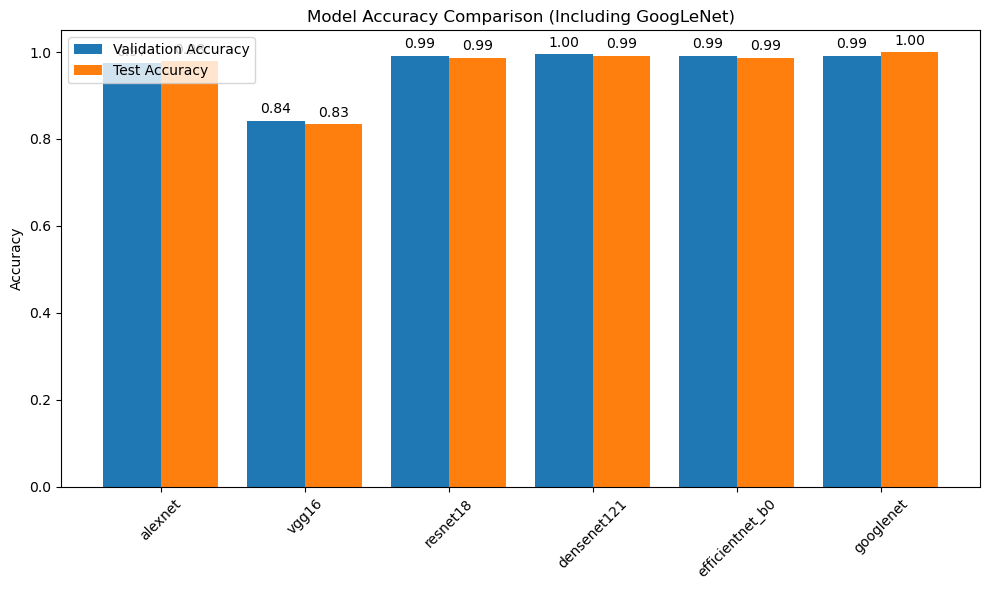

In [25]:
# Add GoogLeNet result to comparison
results.append(googlenet_results)

# Re-plot comparison
models, val_scores, test_scores = zip(*results)
x = range(len(models))

plt.figure(figsize=(10, 6))
val_bars = plt.bar([i - 0.2 for i in x], val_scores, width=0.4, label='Validation Accuracy')
test_bars = plt.bar([i + 0.2 for i in x], test_scores, width=0.4, label='Test Accuracy')

for bar in val_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.xticks(x, models, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Including GoogLeNet)")
plt.legend()
plt.tight_layout()
plt.savefig("accuracy_comparison_with_googlenet.png")
plt.show()
